<a href="https://colab.research.google.com/github/team0243/practic/blob/main/yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install ultralytics
import ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.0/646.0 kB 10.3 MB/s eta 0:00:00


In [2]:
ultralytics.checks()

Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


# 1. Predict

In [3]:
# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

100% 6.23M/6.23M [00:00<00:00, 76.5MB/s]
Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 165k/165k [00:00<00:00, 5.45MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 84.3ms
Speed: 12.4ms preprocess, 84.3ms inference, 280.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [4]:
import numpy as np
import cv2

In [5]:
img = cv2.imread("/content/runs/detect/predict/zidane.jpg")

In [6]:
from google.colab.patches import cv2_imshow

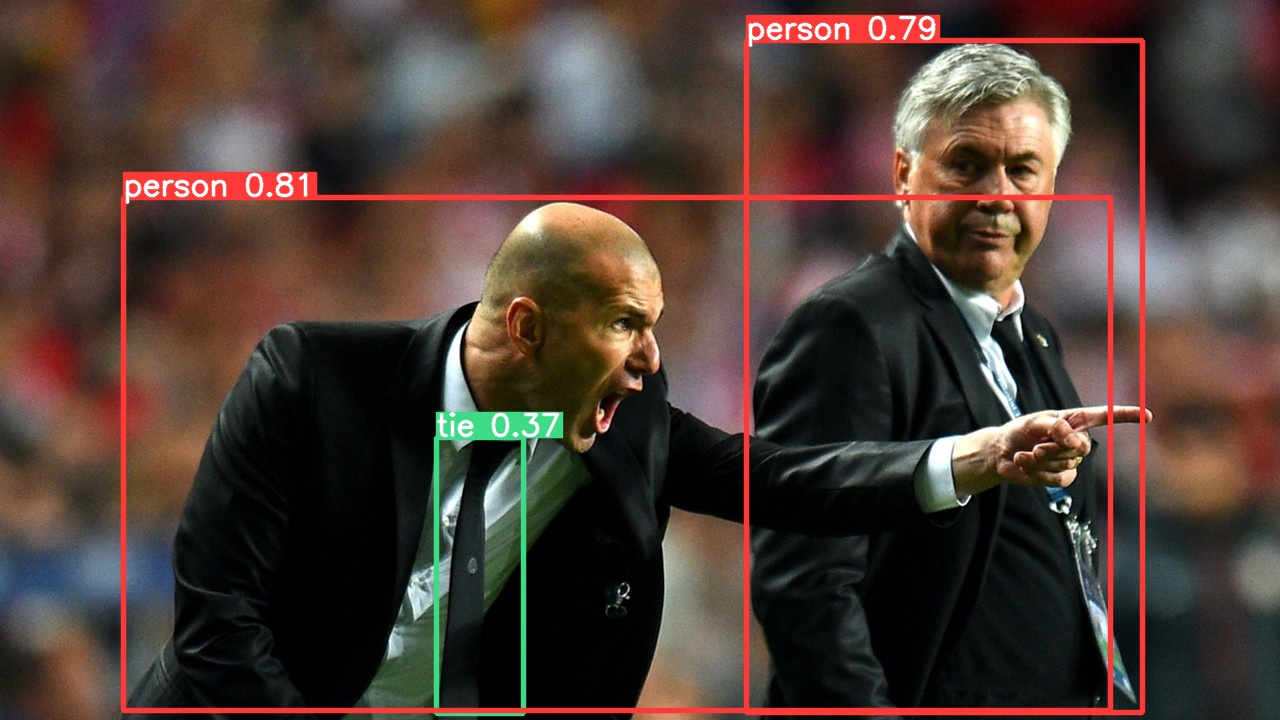

In [7]:
cv2_imshow(img)

# 2. Val

In [8]:
# Download data val
!unzip /content/drive/MyDrive/meningioma_v8/Meningioma_part2.zip
  # unzip

Archive:  /content/drive/MyDrive/meningioma_v8/Meningioma_part2.zip
   creating: Meningioma_part2/
  inflating: Meningioma_part2/data.yaml  
  inflating: Meningioma_part2/Meningioma_part2.zip  
  inflating: Meningioma_part2/README.roboflow.txt  
   creating: Meningioma_part2/test/
   creating: Meningioma_part2/test/images/
  inflating: Meningioma_part2/test/images/Macronucleoli_04_png.rf.37ecf6f32d9ab77b13ef87ab6cf8ca10.jpg  
  inflating: Meningioma_part2/test/images/Macronucleoli_11_png.rf.7d3552d4ad69667d76a496f5ae691496.jpg  
  inflating: Meningioma_part2/test/images/Macronucleoli_17_png.rf.df79b3562c02796a83eef0c31c3c5a36.jpg  
  inflating: Meningioma_part2/test/images/Mitosis-like_09_jpg.rf.7d2cd2676782f906d4426bcc497e5231.jpg  
  inflating: Meningioma_part2/test/images/Mitosis-like_15_jpg.rf.ceab354f965d03eb948470c29bc16ea1.jpg  
   creating: Meningioma_part2/test/labels/
  inflating: Meningioma_part2/test/labels/Macronucleoli_04_png.rf.37ecf6f32d9ab77b13ef87ab6cf8ca10.txt  
  in

In [24]:
# Validate YOLOv8n on COCO8 val
!yolo val model=yolov8n.pt data= '/content/Meningioma_part2/data.yaml' project= runs/detect name=val_mening

Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
val: Scanning /content/Meningioma_part2/valid/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100% 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.73it/s]
                   all          9         23          0          0          0          0
Speed: 0.2ms preprocess, 30.4ms inference, 0.0ms loss, 11.7ms postprocess per image
Results saved to runs/detect/val_mening
💡 Learn more at https://docs.ultralytics.com/modes/val


In [30]:
# Train YOLOv8n on data for 3 epochs
!yolo train model=yolov8n.pt data='/content/Meningioma_part2/data.yaml' epochs=100 imgsz=512 batch = 16 patience=100 workers=0

Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Meningioma_part2/data.yaml, epochs=100, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, f

# **predict**

In [16]:
from ultralytics import YOLO

In [31]:
model = YOLO("/content/runs/detect/train2/weights/best.pt")

In [32]:
results = model.predict("/content/Meningioma_part2/test/images/Macronucleoli_04_png.rf.37ecf6f32d9ab77b13ef87ab6cf8ca10.jpg")


image 1/1 /content/Meningioma_part2/test/images/Macronucleoli_04_png.rf.37ecf6f32d9ab77b13ef87ab6cf8ca10.jpg: 512x512 7 Macronucleolis, 8.8ms
Speed: 1.3ms preprocess, 8.8ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 512)


In [33]:
result = results[0]
print(len(result.boxes)) # find number of boxes

7


In [34]:
for box in result.boxes:
  label = result.names[box.cls[0].item()]
  cords = [round(x) for x in box.xyxy[0].tolist()]
  prop = box.conf[0].item()
  print("Object type:", label)
  print("Coordinates:", cords)
  print("Probability:", prop)
  print("---")

Object type: Macronucleoli
Coordinates: [0, 425, 70, 485]
Probability: 0.6739624738693237
---
Object type: Macronucleoli
Coordinates: [235, 258, 292, 318]
Probability: 0.6723579168319702
---
Object type: Macronucleoli
Coordinates: [364, 248, 420, 319]
Probability: 0.635604202747345
---
Object type: Macronucleoli
Coordinates: [407, 208, 482, 274]
Probability: 0.5256463289260864
---
Object type: Macronucleoli
Coordinates: [459, 193, 512, 251]
Probability: 0.44324150681495667
---
Object type: Macronucleoli
Coordinates: [402, 0, 462, 38]
Probability: 0.37193068861961365
---
Object type: Macronucleoli
Coordinates: [0, 313, 45, 369]
Probability: 0.34035220742225647
---


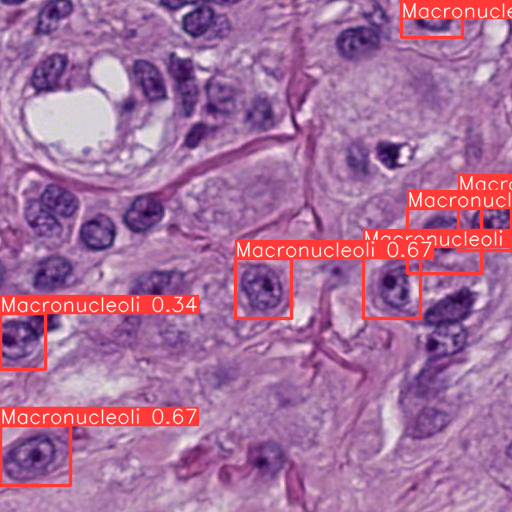

In [35]:
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])

# result

In [40]:
re = cv2.imread("/content/runs/detect/train2/results.png")

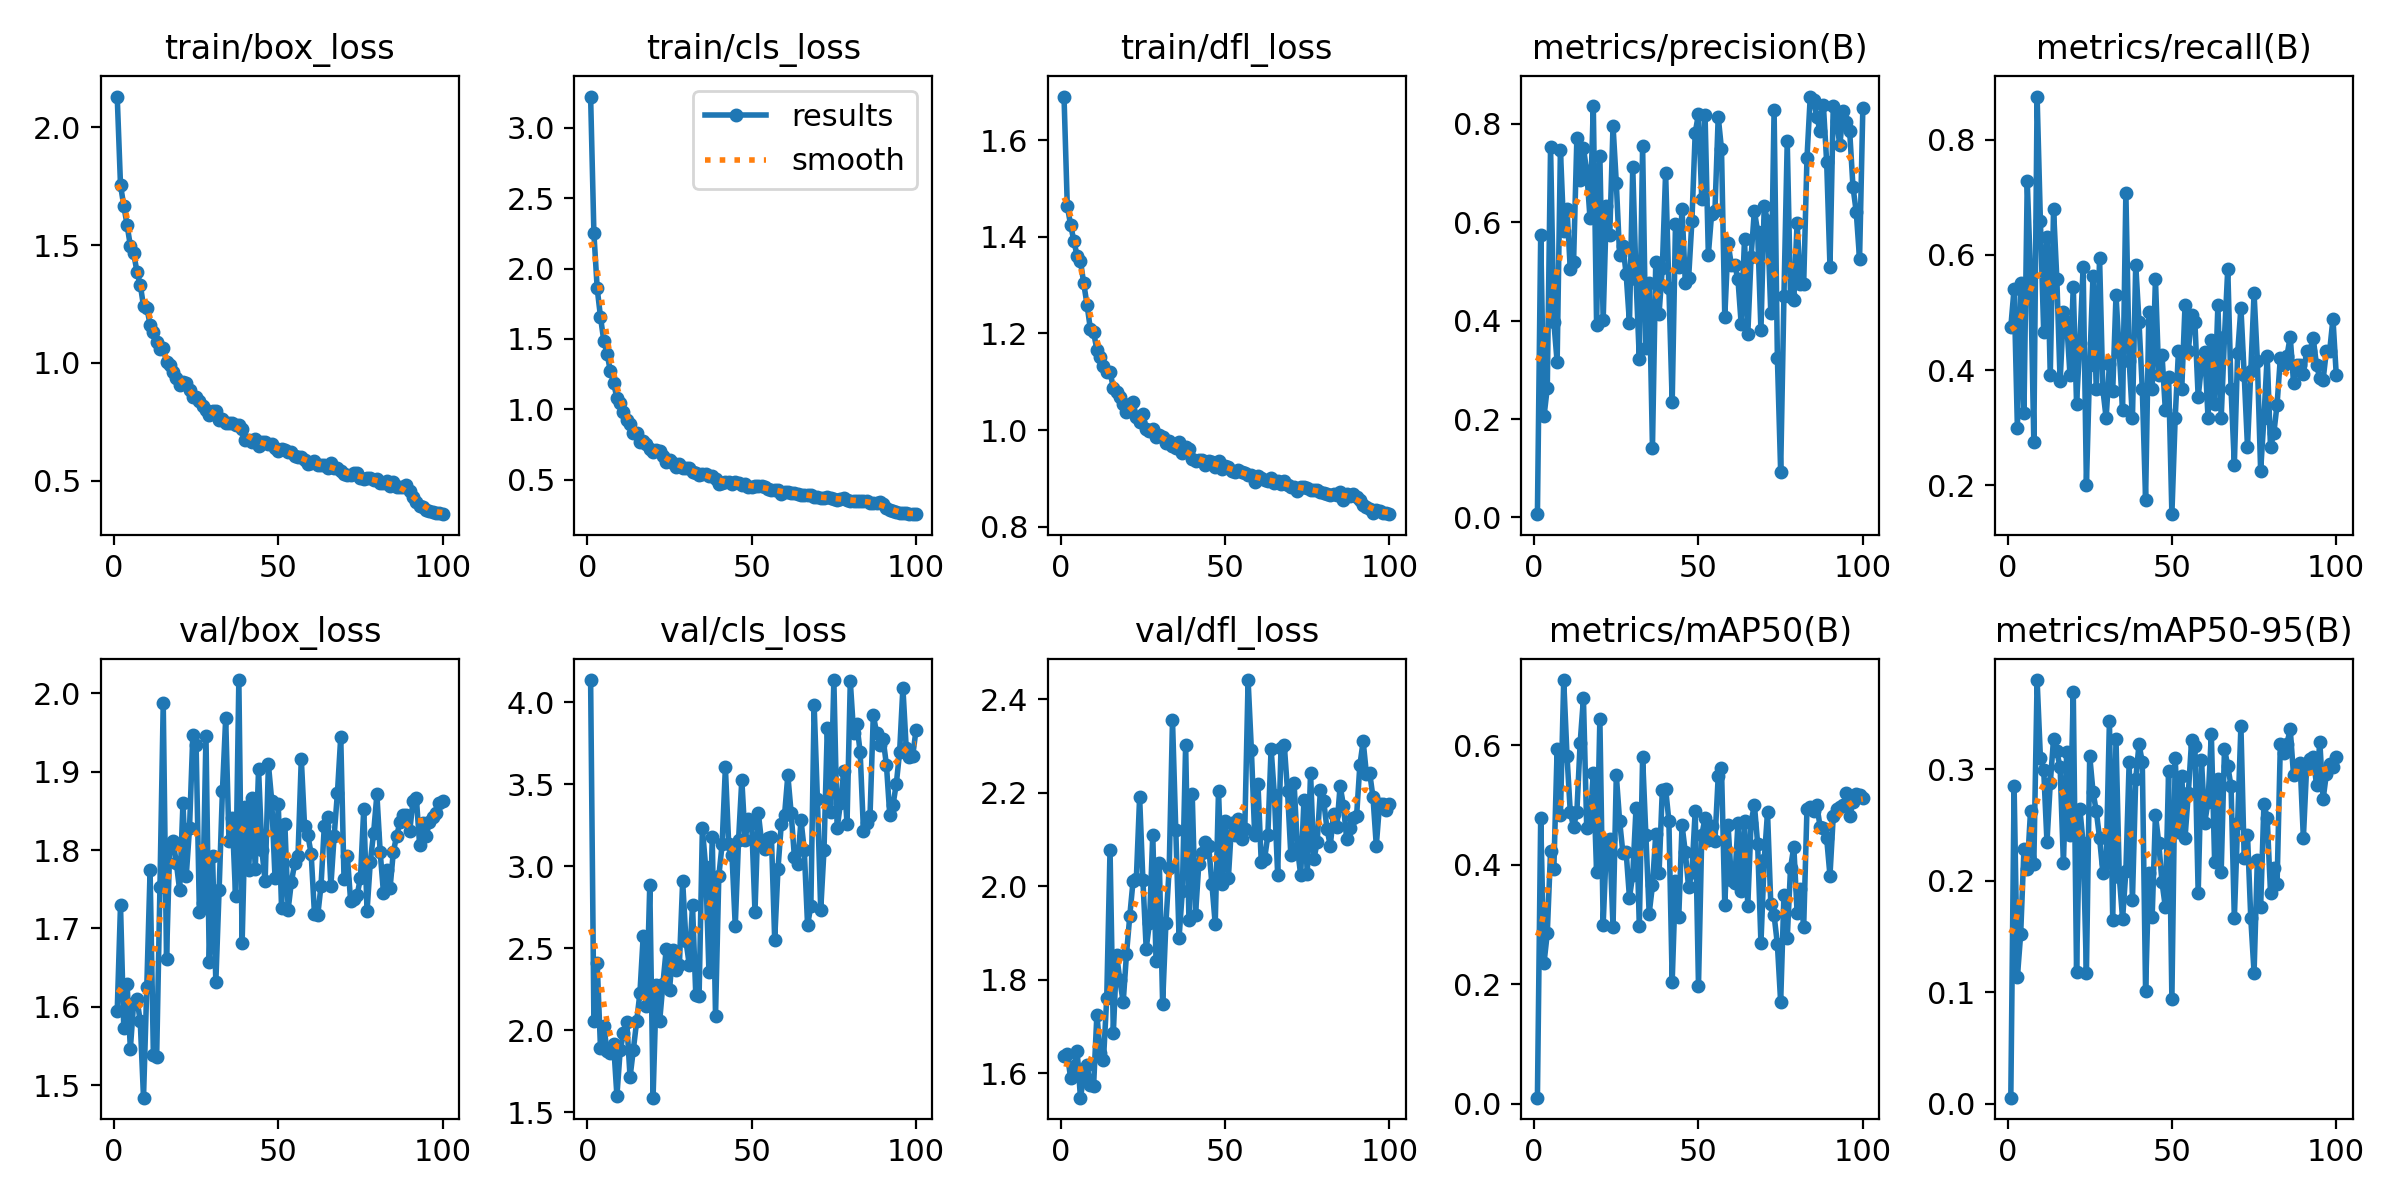

In [41]:
cv2_imshow(re)